#載入套件


In [1]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 91kB/s 


#載入資料

In [2]:
!cp '/content/drive/MyDrive/data/data_v5.zip' /content  #載入ZIP
!cp '/content/drive/MyDrive/data/data_v6.zip' /content  #載入ZIP

In [3]:
!unzip /content/data_v5.zip -d /content/    #解壓縮
!unzip /content/data_v6.zip -d /content/    #解壓縮

Archive:  /content/data_v5.zip
   creating: /content/data_V5/
  inflating: /content/data_V5/happy.csv  
  inflating: /content/data_V5/husband.csv  
  inflating: /content/data_V5/older_brother.csv  
  inflating: /content/data_V5/one_year.csv  
  inflating: /content/data_V5/wedding.csv  
  inflating: /content/data_V5/wife.csv  
  inflating: /content/data_V5/younger_brother.csv  
Archive:  /content/data_v6.zip
   creating: /content/data_v6/
  inflating: /content/data_v6/happy.csv  
  inflating: /content/data_v6/husband.csv  
  inflating: /content/data_v6/older_brother.csv  
  inflating: /content/data_v6/one_year.csv  
  inflating: /content/data_v6/wedding.csv  
  inflating: /content/data_v6/wife.csv  
  inflating: /content/data_v6/younger_brother.csv  


In [ ]:
# %rm -rf data_v2.zip         #刪除資料夾hand or 檔案

#資料前處理

In [4]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline


##處理0的方法一

In [ ]:
def deal_0(train):
  train = train.iloc[:,1:-1]
  count=0
  while not train.min().all()   :   #直到最小值沒有0
    if count > 4: 
      break
    count += 1
    for i in range(0,len(train)):
      if train.iloc[i,0] == 0: 
        if i % 20 == 0:
          train.iloc[i,0:63] = train.iloc[i+1,0:63]
        elif i % 20 == 19:
          train.iloc[i,0:63] = train.iloc[i-1,0:63]
        else:      
          train.iloc[i,0:63] = (train.iloc[i-1,0:63]+train.iloc[i+1,0:63])/2

      if train.iloc[i,63] == 0:
        if i % 20 == 0:
          train.iloc[i,63:126] = train.iloc[i+1,63:126]
        elif i % 20 == 19:
          train.iloc[i,63:126] = train.iloc[i-1,63:126]
        else:      
          train.iloc[i,63:126] = (train.iloc[i-1,63:126]+train.iloc[i+1,63:126])/2
      
      if train.iloc[i,126] == 0:
        if i % 20 == 0:
          train.iloc[i,126:129] = train.iloc[i+1,126:129]
        elif i % 20 == 19:
          train.iloc[i,126:129] = train.iloc[i-1,126:129]
        else:      
          train.iloc[i,126:129] = (train.iloc[i-1,126:129]+train.iloc[i+1,126:129])/2

      if train.iloc[i,129] == 0:
        if i % 20 == 0:
          train.iloc[i,129:132] = train.iloc[i+1,129:132]
        elif i % 20 == 19:
          train.iloc[i,129:132] = train.iloc[i-1,129:132]
        else:      
          train.iloc[i,129:132] = (train.iloc[i-1,129:132]+train.iloc[i+1,129:132])/2

      if train.iloc[i,132] == 0:
        if i % 20 == 0:
          train.iloc[i,132:135] = train.iloc[i+1,132:135]
        elif i % 20 == 19:
          train.iloc[i,132:135] = train.iloc[i-1,132:135]
        else:      
          train.iloc[i,132:135] = (train.iloc[i-1,132:135]+train.iloc[i+1,132:135])/2
  return train


##處理0的方法二

In [5]:
def deal_0(train):
  train = train.iloc[:,1:]
  print(train.shape)
  up=1
  #0~63
  error_0 = 1
  error_63 = 1
  error_126 = 1
  error_129 = 1
  error_132 = 1
  for i in range(0,len(train)):
    if train.iloc[i,0] == 0 and error_0 != 1:
      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_0 = 0
            print('error_0 = 0')
            break
          if train.iloc[i+up , 0] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,0:63] = train.iloc[i+up,0:63]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_0 = 0
            print('error_0 = 0')
            break
          if train.iloc[i-up , 0] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,0:63] = train.iloc[i-up,0:63]
            up -= 1
      else:
        up=1
        while 1 :
            
          if up>15:
            error_0 = 0
            print('error_0 = 0')
            break
          if train.iloc[i + up , 0] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,0:63] = train.iloc[i-1,0:63] - ( (train.iloc[i-1,0:63]-train.iloc[i+up,0:63]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,0:63] = train.iloc[i-1,0:63]
            break
            
    
    #63~126
    if train.iloc[i,63] == 0 and error_63 != 1:
      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_63 = 0
            print('error_63 = 0')
            break
          if train.iloc[i+up , 63] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,63:126] = train.iloc[i+up,63:126]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_63 = 0
            print('error_63 = 0')
            break
          if train.iloc[i-up , 63] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,63:126] = train.iloc[i-up,63:126]
            up -= 1
      else:
        
        up=1
        while 1 :
          if up>15:
            error_63 = 0
            print('error_63 = 0')
            break
          if train.iloc[i + up , 63] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,63:126] = train.iloc[i-1,63:126] - ( (train.iloc[i-1,63:126]-train.iloc[i+up,63:126]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,63:126] = train.iloc[i-1,63:126]
            break
    #126~129
    if train.iloc[i,126] == 0 and error_126 != 1:
      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_126 = 0
            print('error_126 = 0')
            break
          if train.iloc[i+up , 126] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,126:129] = train.iloc[i+up,126:129]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_126 = 0
            print('error_126 = 0')
            break
          if train.iloc[i-up , 126] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,126:129] = train.iloc[i-up,126:129]
            up -= 1
      else:
        up=1
        while 1 :
          if up>15:
            error_126 = 0
            print('error_126 = 0')
            break
          if train.iloc[i + up , 126] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,126:129] = train.iloc[i-1,126:129] - ( (train.iloc[i-1,126:129]-train.iloc[i+up,126:129]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,126:129] = train.iloc[i-1,126:129]
            break
    #129~132
    if train.iloc[i,129] == 0 and error_129 != 1:
      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_129 = 0
            print('error_129 = 0')
            break
          if train.iloc[i+up , 129] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,129:132] = train.iloc[i+up,129:132]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_129 = 0
            print('error_129 = 0')
            break
          if train.iloc[i-up , 129] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,129:132] = train.iloc[i-up,129:132]
            up -= 1
      else:
        up=1
        while 1 :
          if up>15:
            error_129 = 0
            print('error_129 = 0')
            break
          if train.iloc[i + up , 129] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,129:132] = train.iloc[i-1,129:132] - ( (train.iloc[i-1,129:132]-train.iloc[i+up,129:132]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,129:132] = train.iloc[i-1,129:132]
            break
    #132~135
    if train.iloc[i,132] == 0 and error_132 != 1:

      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_132 = 0
            print('error_132 = 0')
            break
          if train.iloc[i+up , 132] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,132:135] = train.iloc[i+up,132:135]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_132 = 0
            print('error_132 = 0')
            break
          if train.iloc[i-up , 132] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,132:135] = train.iloc[i-up,132:135]
            up -= 1
      else:
        up=1
        while 1 :
          if up>15:
            error_132 = 0
            print('error_132 = 0')
            break
          if train.iloc[i + up , 132] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,132:135] = train.iloc[i-1,132:135] - ( (train.iloc[i-1,132:135]-train.iloc[i+up,132:135]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,132:135] = train.iloc[i-1,132:135]
            break
            
  return train


##整合資料

In [14]:
def buildTrain(train, y):  #幾筆資料為一組
  X_train, Y_train = [], []
  L = [0,4,8,12,16,20,21,25,29,33,37,41,44]
  a_0 = np.array(train.iloc[:,0*3:(0+1)*3])
  a_1 = np.array(train.iloc[:,4*3:(4+1)*3])
  a_2 = np.array(train.iloc[:,8*3:(8+1)*3])
  a_3 = np.array(train.iloc[:,12*3:(12+1)*3])
  a_4 = np.array(train.iloc[:,16*3:(16+1)*3])
  a_5 = np.array(train.iloc[:,20*3:(20+1)*3])
  a_6 = np.array(train.iloc[:,21*3:(21+1)*3])
  a_7 = np.array(train.iloc[:,25*3:(25+1)*3])
  a_8 = np.array(train.iloc[:,29*3:(29+1)*3])
  a_9 = np.array(train.iloc[:,33*3:(33+1)*3])
  a_10 = np.array(train.iloc[:,37*3:(37+1)*3])
  a_11 = np.array(train.iloc[:,41*3:(41+1)*3])
  a_12 = np.array(train.iloc[:,42*3:(42+1)*3])

  x = np.hstack((a_0,a_1))
  x = np.hstack((x,a_2))
  x = np.hstack((x,a_3))
  x = np.hstack((x,a_4))
  x = np.hstack((x,a_5))
  x = np.hstack((x,a_6))
  x = np.hstack((x,a_7))
  x = np.hstack((x,a_8))
  x = np.hstack((x,a_9))
  x = np.hstack((x,a_10))
  x = np.hstack((x,a_11))
  x = np.hstack((x,a_12))

  print(x.shape)
  a=90
  for i in range(0,len(train)//a):
    X_train.append(np.array(x[i*a:i*a+a]))
    Y_train.append(y)
  return np.array(X_train), np.array(Y_train)

In [78]:
def buildTrain(train, y):  #幾筆資料為一組
  X_train, Y_train = [], []
  L = [0,4,8,12,16,20,21,25,29,33,37,41,44]
  a_0 = np.array(train.iloc[:,0*3:(0+1)*3])
  a_1 = np.array(train.iloc[:,4*3:(4+1)*3])
  a_2 = np.array(train.iloc[:,8*3:(8+1)*3])
  a_3 = np.array(train.iloc[:,12*3:(12+1)*3])
  a_4 = np.array(train.iloc[:,16*3:(16+1)*3])
  a_5 = np.array(train.iloc[:,20*3:(20+1)*3])
  a_6 = np.array(train.iloc[:,21*3:(21+1)*3])
  a_7 = np.array(train.iloc[:,25*3:(25+1)*3])
  a_8 = np.array(train.iloc[:,29*3:(29+1)*3])
  a_9 = np.array(train.iloc[:,33*3:(33+1)*3])
  a_10 = np.array(train.iloc[:,37*3:(37+1)*3])
  a_11 = np.array(train.iloc[:,41*3:(41+1)*3])
  a_12 = np.array(train.iloc[:,42*3:(42+1)*3])

  x = np.hstack((a_0,a_1))
  x = np.hstack((x,a_2))
  x = np.hstack((x,a_3))
  x = np.hstack((x,a_4))
  x = np.hstack((x,a_5))
  x = np.hstack((x,a_6))
  x = np.hstack((x,a_7))
  x = np.hstack((x,a_8))
  x = np.hstack((x,a_9))
  x = np.hstack((x,a_10))
  x = np.hstack((x,a_11))
  x = np.hstack((x,a_12))


  print(x.shape)
  a=90
  for i in range(0,len(train)//a):
    X_train.append(np.array(x[i*a:i*a+a]))
    Y_train.append(y)
  return np.array(X_train), np.array(Y_train)

In [79]:
file_list = ['happy','husband','older_brother','one_year','wedding','wife','younger_brother']
file_os = "/content/data_V5/"
#0
train = pd.read_csv(file_os+"happy.csv")
train = deal_0(train)
X_train_1, Y_train_1 = buildTrain(train,0)
print(X_train_1.shape)
#1
train = pd.read_csv(file_os+"husband.csv")
train = deal_0(train)
X_train_2, Y_train_2 = buildTrain(train,1)

print(X_train_2.shape)
X=np.concatenate((X_train_1, X_train_2), axis=0)
Y=np.concatenate((Y_train_1, Y_train_2), axis=0)
#2
for i in range(2,len(file_list)):
  print(file_list[i])
  train = pd.read_csv(file_os+file_list[i]+'.csv')
  train = deal_0(train)
  X_train, Y_train = buildTrain(train,i)
  X=np.concatenate((X, X_train), axis=0)
  Y=np.concatenate((Y, Y_train), axis=0) 

# train = pd.read_csv("/content/data_v2/older_brother.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,2)

# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)
# #3
# train = pd.read_csv("/content/data_v2/one_year.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,3)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)
# #4
# train = pd.read_csv("/content/data_v2/wedding.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,4)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)
# #5
# train = pd.read_csv("/content/data_v2/wife.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,5)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)
# #6
# train = pd.read_csv("/content/data_v2/younger_brother.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,6)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)

(9000, 135)
(9000, 39)
(100, 90, 39)
(9000, 135)
(9000, 39)
(100, 90, 39)
older_brother
(9000, 135)
(9000, 39)
one_year
(9000, 135)
(9000, 39)
wedding
(9000, 135)
(9000, 39)
wife
(9000, 135)
(9000, 39)
younger_brother
(9000, 135)
(9000, 39)


In [80]:
file_list = ['happy','husband','older_brother','one_year','wedding','wife','younger_brother']
file_os = "/content/data_v6/"
for i in range(0,len(file_list)):
  print(file_list[i])
  train = pd.read_csv(file_os+file_list[i]+'.csv')
  train = deal_0(train)
  X_train, Y_train = buildTrain(train,i)
  X=np.concatenate((X, X_train), axis=0)
  Y=np.concatenate((Y, Y_train), axis=0) 


happy
(9000, 135)
(9000, 39)
husband
(9000, 135)
(9000, 39)
older_brother
(9000, 135)
(9000, 39)
one_year
(9000, 135)
(9000, 39)
wedding
(9000, 135)
(9000, 39)
wife
(9000, 135)
(9000, 39)
younger_brother
(9000, 135)
(9000, 39)


In [ ]:
X

#Model

##資料切割成測試集跟訓練集

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,test_size=0.2,random_state=1,
)

##訓練model

In [82]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

batch_size = 128
model = Sequential()
# model.add(Embedding(max_features, 8, input_length=500))
# model.add(Dropout(0.5))
model.add(LSTM(256, input_shape=(X.shape[1],X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopper = EarlyStopping(min_delta=0.001, patience=10)
# early_stopper = EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=20,verbose=1, mode='auto')

history = model.fit(X_train, Y_train,
                    epochs=200,
                    shuffle=True,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[early_stopper])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 90, 256)           303104    
_________________________________________________________________
dropout_10 (Dropout)         (None, 90, 256)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                82176     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 455       
Total params: 385,735
Trainable params: 385,735
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 11s 829ms/step - loss: 1.8477 - accuracy: 0.1923 - val_loss: 

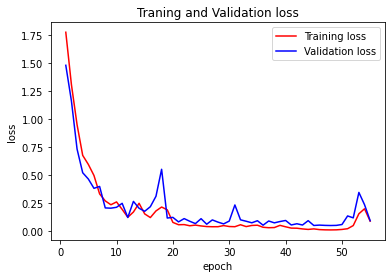

In [83]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, len(loss)+1)
plt.plot(epoch, loss, 'r', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Traning and Validation loss')
plt.xlabel('epoch')

plt.ylabel('loss')
plt.legend()
plt.show()

##model測試

In [84]:
result = model.predict(X_test)
# print(result)

y_predict = np.argmax(result,axis=1)
print(y_predict)
print(Y_test)

test_acc= len(y_predict[y_predict == Y_test])/len(Y_test) * 100
print(f"Test accuracy: {format(test_acc)}%")

[5 0 5 4 3 3 2 4 3 2 1 2 0 4 5 6 2 4 3 3 3 0 1 6 5 5 5 2 5 4 6 4 5 0 0 5 6
 4 5 3 0 5 1 0 4 5 1 2 2 0 4 2 2 1 5 4 6 5 4 0 4 5 5 5 3 0 2 1 1 0 0 5 1 5
 6 3 5 2 4 3 4 0 4 3 1 4 5 5 2 3 3 5 2 3 1 4 3 1 3 4 6 3 1 5 2 1 3 5 4 6 2
 0 6 1 3 2 2 1 1 5 6 5 2 5 4 5 0 4 0 6 0 3 4 3 0 5 6 4 1 4 0 6 6 6 1 1 0 6
 6 1 3 4 0 3 0 1 5 3 6 4 5 6 1 4 0 5 4 0 4 6 6 4 0 4 1 4 2 0 6 6 1 3 3 1 3
 3 2 1 0 3 2 1 6 3 2 0 2 0 4 4 0 1 5 2 1 6 2 1 4 5 2 3 3 0 0 2 6 0 2 4 0 6
 0 2 5 2 0 4 2 4 6 1 2 2 0 0 3 0 0 6 3 3 6 6 1 4 2 6 1 5 4 5 5 6 5 2 1 2 3
 5 3 4 5 1 4 6 6 4 2 2 6 5 5 5 0 6 0 2 6 0]
[5 0 5 4 3 3 2 4 3 2 1 2 0 4 5 6 2 4 3 3 3 0 1 6 5 5 5 2 5 4 6 4 5 0 0 5 6
 4 5 3 0 5 1 0 4 5 1 2 2 0 4 2 2 1 5 4 6 5 4 0 4 5 5 5 3 0 2 1 1 0 3 5 1 5
 6 3 5 2 4 3 4 0 4 3 1 4 5 5 2 3 3 5 2 3 1 4 3 1 3 4 6 3 1 5 2 1 3 5 4 6 2
 0 6 1 3 2 2 1 1 5 6 5 2 5 4 5 0 4 0 6 0 3 4 3 0 5 6 4 1 4 3 6 6 6 1 1 0 6
 6 1 3 4 3 3 0 1 5 3 6 4 5 6 1 4 0 5 4 0 4 6 6 4 0 4 1 4 2 0 6 6 1 3 3 1 3
 3 2 1 0 3 2 1 6 3 2 0 2 0 4 4 0 1 5 2 1 6 2 1 4 5 2 3 3

##儲存model

In [ ]:
model.save('/content/drive/MyDrive/data/model_v2.h5')
print("model_v2 is OK")

model_v2 is OK


##載入model

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/data/model_v1.h5')

#載入其他影片資料

In [22]:
!cp '/content/drive/MyDrive/data/001.csv' /content  #載入
!cp '/content/drive/MyDrive/data/003.csv' /content  #載入
!cp '/content/drive/MyDrive/data/005.csv' /content  #載入
!cp '/content/drive/MyDrive/data/006.csv' /content  #載入
!cp '/content/drive/MyDrive/data/007.csv' /content  #載入
!cp '/content/drive/MyDrive/data/010.csv' /content  #載入

In [ ]:
# train = pd.read_csv("/content/010.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,0)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0) 

In [89]:
train = pd.read_csv("/content/001.csv")
train = deal_0(train)
X_test, Y_test = buildTrain(train,2)

(90, 135)
(90, 39)


In [90]:
result = model.predict(X_test)
print(result)

y_predict = np.argmax(result,axis=1)
print(y_predict)
print(Y_test)

test_acc= len(y_predict[y_predict == Y_test])/len(Y_test) * 100
print(f"Test accuracy: {format(test_acc)}%")

[[1.6060956e-02 2.0386758e-03 9.6544698e-03 9.7719161e-03 3.6310051e-02
  3.5244750e-04 9.2581141e-01]]
[6]
[2]
Test accuracy: 0.0%
